<a href="https://colab.research.google.com/github/Kalmar41k/internet-service-churn-prediction/blob/svm_model/models/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Завантаження файлу

In [2]:
from google.colab import files
uploaded = files.upload()

Saving internet_service_churn.csv to internet_service_churn.csv
Saving preprocessed_data.csv to preprocessed_data.csv
Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [3]:
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')


In [4]:
# Перетворимо y у формат 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Стандартизація ознак

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Навчання моделі SVM


In [15]:
# 1. Лінійне ядро з балансуванням класів
model1 = SVC(kernel='linear', class_weight='balanced', random_state=42)
model1.fit(X_train_scaled, y_train.ravel())

SVC(class_weight='balanced', kernel='linear', random_state=42)

Accuracy: 0.8753

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6532
           1       0.86      0.92      0.89      7923

    accuracy                           0.88     14455
   macro avg       0.88      0.87      0.87     14455
weighted avg       0.88      0.88      0.87     14455



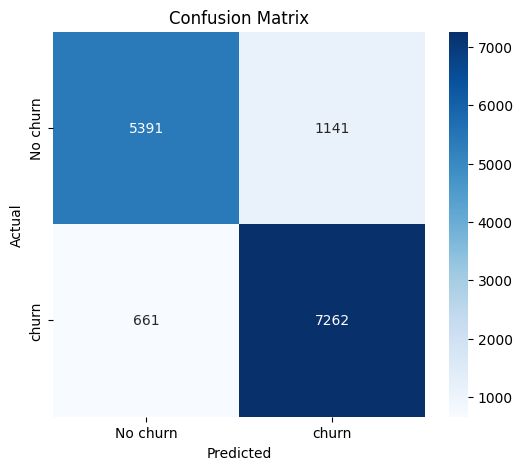

In [16]:
# Передбачення на тестових даних
y_pred = model1.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# SVM з жорсткою регуляризацією (C=0.1)
model2 = SVC(kernel='linear', C=0.1, random_state=42)
model2.fit(X_train_scaled, y_train.ravel())

SVC(C=0.1, kernel='linear', random_state=42)

Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6532
           1       0.84      0.92      0.88      7923

    accuracy                           0.86     14455
   macro avg       0.87      0.86      0.86     14455
weighted avg       0.87      0.86      0.86     14455



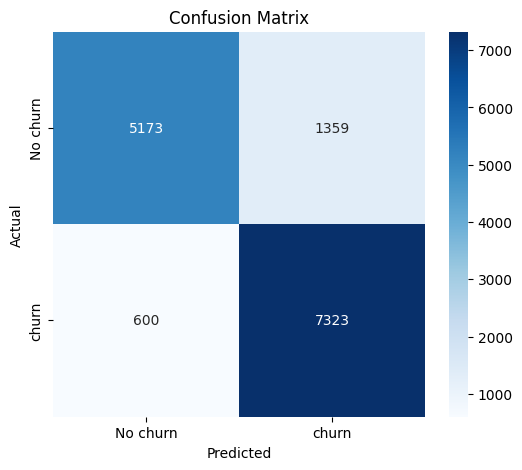

In [8]:
# Передбачення на тестових даних
y_pred = model2.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# SVM з меншою регуляризацією (C=10)
model3 = SVC(kernel='linear', C=10, random_state=42)
model3.fit(X_train_scaled, y_train.ravel())

SVC(C=10, kernel='linear', random_state=42)

Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6532
           1       0.84      0.92      0.88      7923

    accuracy                           0.86     14455
   macro avg       0.87      0.86      0.86     14455
weighted avg       0.87      0.86      0.86     14455



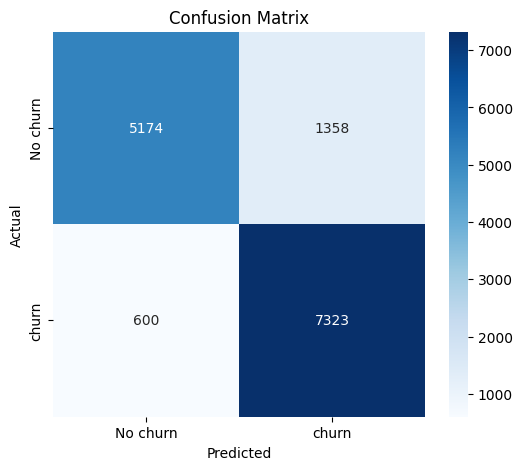

In [10]:
# Передбачення на тестових даних
y_pred = model3.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Радіальне базисне ядро (RBF)
model4 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model4.fit(X_train_scaled, y_train.ravel())

SVC(random_state=42)

Accuracy: 0.9038

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6532
           1       0.90      0.92      0.91      7923

    accuracy                           0.90     14455
   macro avg       0.90      0.90      0.90     14455
weighted avg       0.90      0.90      0.90     14455



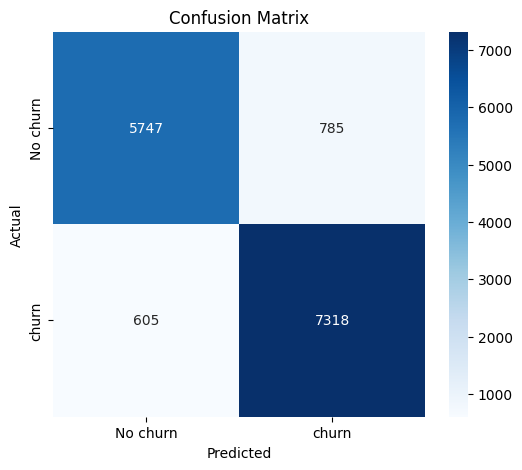

In [13]:
# Передбачення на тестових даних
y_pred = model4.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1️⃣ Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Перелік ядер для тестування
kernels = ["linear", "rbf", "poly", "sigmoid"]

results = {}

for kernel in kernels:
    print(f"Навчання SVM з ядром: {kernel}")

    # 3️⃣ Створення та навчання моделі
    model = SVC(kernel=kernel, class_weight="balanced", probability=True, random_state=42)
    model.fit(X_train_scaled, y_train.ravel())

    # 4️⃣ Передбачення
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Для ROC-AUC

    # 5️⃣ Оцінка моделі
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }

    results[kernel] = metrics

# 6️⃣ Вивід результатів
import pandas as pd
results_df = pd.DataFrame(results).T
print("\n📊 Порівняння SVM моделей:\n", results_df)

# 7️⃣ Вибір найкращої моделі (за F1-score + ROC-AUC)
best_kernel = results_df[['F1-score', 'ROC-AUC']].mean(axis=1).idxmax()
print(f"\n✅ Найкраще ядро для SVM: {best_kernel}")



Навчання SVM з ядром: linear
Навчання SVM з ядром: rbf
Навчання SVM з ядром: poly
Навчання SVM з ядром: sigmoid

📊 Порівняння SVM моделей:
          Accuracy  Precision    Recall  F1-score   ROC-AUC
linear   0.875337   0.864215  0.916572  0.889624  0.936425
rbf      0.906399   0.910010  0.920232  0.915093  0.950588
poly     0.891525   0.888685  0.916951  0.902597  0.935398
sigmoid  0.793912   0.824154  0.793260  0.808412  0.858864

✅ Найкраще ядро для SVM: rbf


In [8]:
model5 = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
model5.fit(X_train_scaled, y_train.ravel())

SVC(C=0.1, random_state=42)

Accuracy: 0.8910

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      6532
           1       0.88      0.93      0.90      7923

    accuracy                           0.89     14455
   macro avg       0.89      0.89      0.89     14455
weighted avg       0.89      0.89      0.89     14455



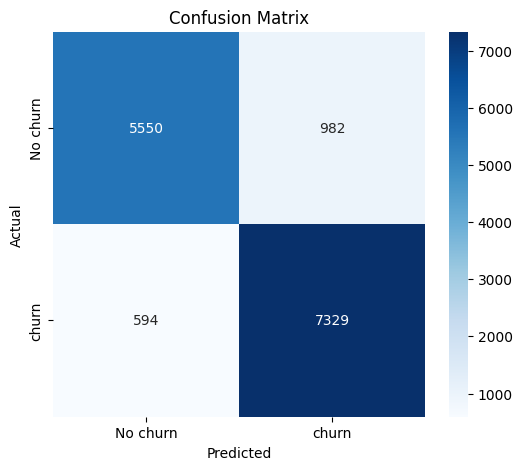

In [9]:
# Передбачення на тестових даних
y_pred = model5.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
model6 = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
model6.fit(X_train_scaled, y_train.ravel())

SVC(C=10, random_state=42)

Accuracy: 0.9122

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6532
           1       0.92      0.93      0.92      7923

    accuracy                           0.91     14455
   macro avg       0.91      0.91      0.91     14455
weighted avg       0.91      0.91      0.91     14455



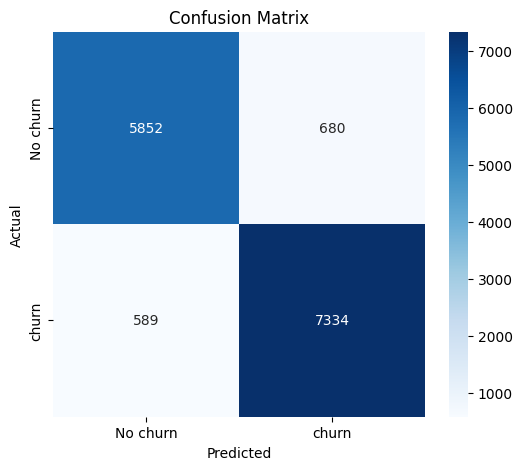

In [12]:
# Передбачення на тестових даних
y_pred = model6.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
model7 = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
model7.fit(X_train_scaled, y_train.ravel())

SVC(C=100, random_state=42)

Accuracy: 0.9164

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6532
           1       0.92      0.93      0.92      7923

    accuracy                           0.92     14455
   macro avg       0.92      0.92      0.92     14455
weighted avg       0.92      0.92      0.92     14455



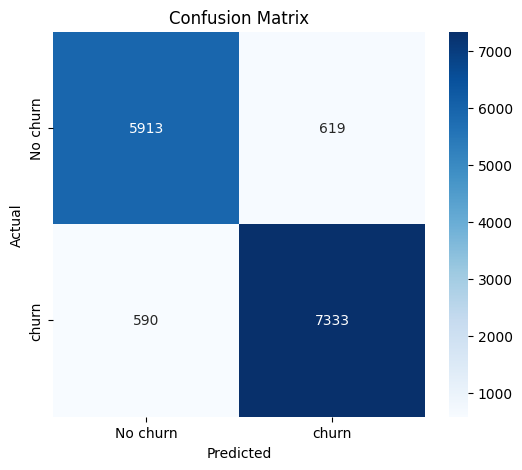

In [14]:
# Передбачення на тестових даних
y_pred = model7.predict(X_test_scaled)

# 1. Точність
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Матриця помилок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Оптимізація гіперпараметрів (RandomizedSearchCV)

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# 1️⃣ Стандартизація
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Діапазон параметрів (менше значень, щоб пришвидшити пошук)
param_dist = {
    'C': uniform(0.1, 10),  # Випадкові значення від 0.1 до 10
    'gamma': uniform(0.001, 0.1),  # Випадкові значення від 0.001 до 0.1
}

# 3️⃣ RandomizedSearchCV (10 ітерацій замість перебору всіх)
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
random_search = RandomizedSearchCV(svm, param_distributions=param_dist,
                                   n_iter=10, scoring='f1', cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train.ravel())

# 4️⃣ Найкращі параметри
best_params = random_search.best_params_
print("✅ Найкращі параметри:", best_params)

# 5️⃣ Оцінка моделі
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")


✅ Найкращі параметри: {'C': 3.845401188473625, 'gamma': 0.09607143064099162}
Accuracy: 0.9099
Precision: 0.9142
Recall: 0.9221
F1-score: 0.9181


Збереження моделі

In [16]:
import joblib

# Збереження найкращої моделі
svm_model = "best_svm_model.pkl"
joblib.dump(best_model, svm_model)

print(f"✅ Модель збережено у файл: {svm_model}")


✅ Модель збережено у файл: best_svm_model.pkl


In [17]:
from google.colab import files

# Завантаження файлу на комп'ютер
files.download(svm_model)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>